In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


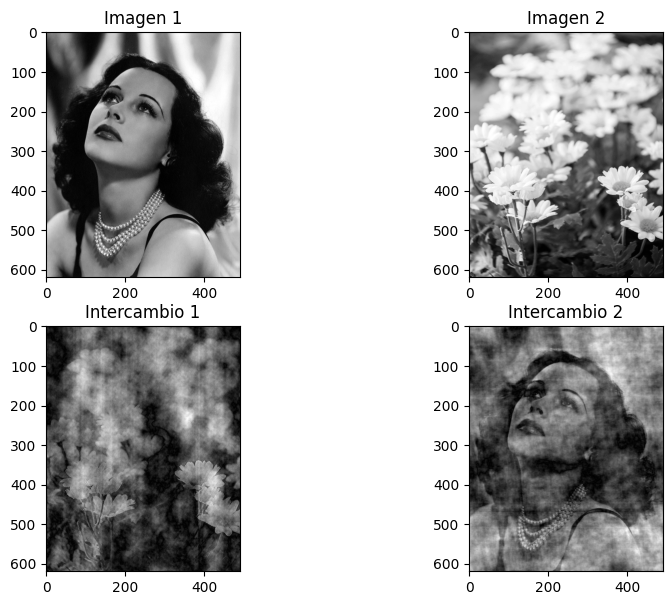

In [10]:
# Cargar las imágenes en escala de grises
img1 = cv2.imread('/content/lamar3.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/margarita.jpg', cv2.IMREAD_GRAYSCALE)

# Ajustar tamaño para que sean iguales
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Obtener la transformada de Fourier de ambas imágenes
f1 = np.fft.fft2(img1)
f2 = np.fft.fft2(img2)

# Desplazar el espectro para centrarlo
f1_shift = np.fft.fftshift(f1)
f2_shift = np.fft.fftshift(f2)

# Separar magnitud y fase
magnitude1, phase1 = np.abs(f1_shift), np.angle(f1_shift)
magnitude2, phase2 = np.abs(f2_shift), np.angle(f2_shift)

# Intercambiar magnitud y fase
swap1 = np.fft.ifft2(np.fft.ifftshift(magnitude1 * np.exp(1j * phase2)))
swap2 = np.fft.ifft2(np.fft.ifftshift(magnitude2 * np.exp(1j * phase1)))

# Convertir a imágenes reales
swap1_img = np.abs(swap1)
swap2_img = np.abs(swap2)

# Mostrar las imágenes originales y las combinadas
plt.figure(figsize=(10, 7))
ax.axis('off')  # Eliminar los números de los ejes
plt.subplot(2, 2, 1), plt.imshow(img1, cmap='gray'), plt.title('Imagen 1')
plt.subplot(2, 2, 2), plt.imshow(img2, cmap='gray'), plt.title('Imagen 2')
plt.subplot(2, 2, 3), plt.imshow(swap1_img, cmap='gray'), plt.title('Intercambio 1')
plt.subplot(2, 2, 4), plt.imshow(swap2_img, cmap='gray'), plt.title('Intercambio 2')
plt.show()

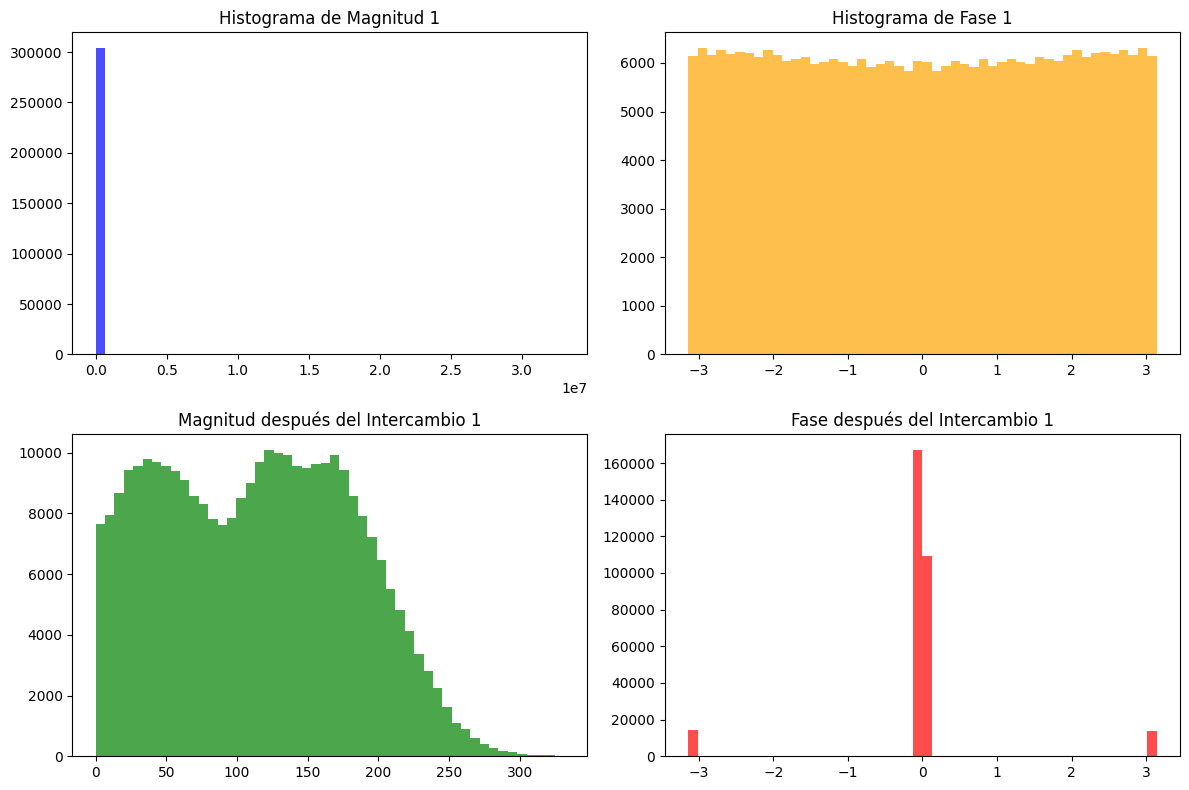

In [13]:
# Crear histogramas de las magnitudes y fases antes y después del intercambio
plt.figure(figsize=(12, 8))

# Histograma de magnitud de la imagen 1
plt.subplot(2, 2, 1)
plt.hist(magnitude1.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Magnitud 1')

# Histograma de fase de la imagen 1
plt.subplot(2, 2, 2)
plt.hist(phase1.ravel(), bins=50, color='orange', alpha=0.7)
plt.title('Histograma de Fase 1')

# Histograma de magnitud de la imagen intercambiada (Mag1 + Fase2)
plt.subplot(2, 2, 3)
plt.hist(np.abs(swap1).ravel(), bins=50, color='green', alpha=0.7)
plt.title('Magnitud después del Intercambio 1')

# Histograma de fase de la imagen intercambiada (Mag1 + Fase2)
plt.subplot(2, 2, 4)
plt.hist(np.angle(swap1).ravel(), bins=50, color='red', alpha=0.7)
plt.title('Fase después del Intercambio 1')

plt.tight_layout()
plt.show()


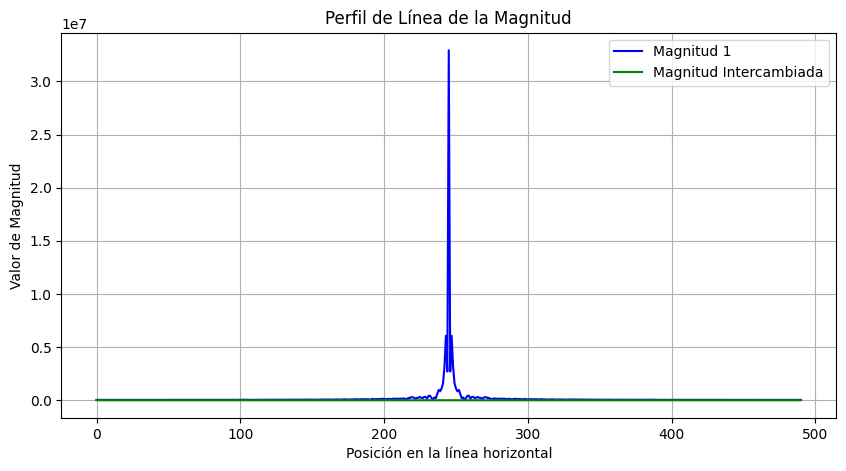

In [9]:
# Seleccionar una línea central para ver el perfil
line_index = img1.shape[0] // 2

# Perfiles de línea
plt.figure(figsize=(10, 5))

# Perfil de magnitud antes y después del intercambio
plt.plot(magnitude1[line_index, :], label='Magnitud 1', color='blue')
plt.plot(np.abs(swap1)[line_index, :], label='Magnitud Intercambiada', color='green')
plt.xlabel('Posición en la línea horizontal')
plt.ylabel('Valor de Magnitud')
plt.title('Perfil de Línea de la Magnitud')
plt.legend()
plt.grid(True)
plt.show()


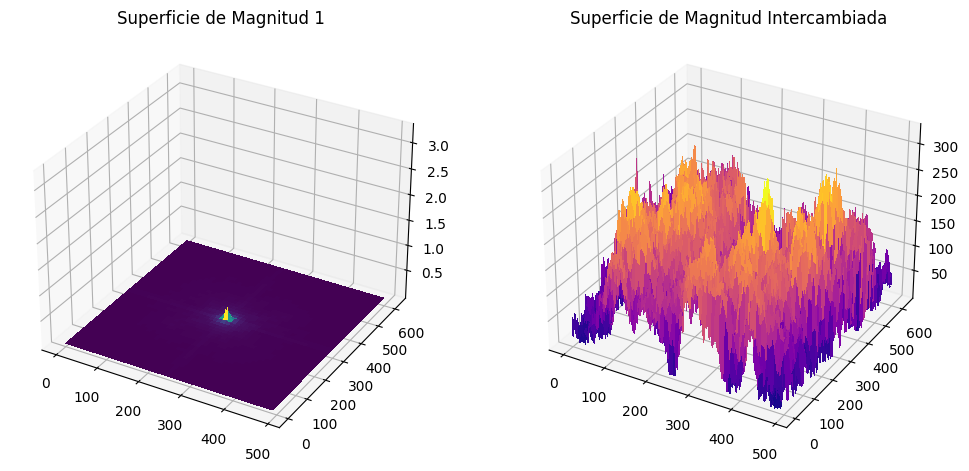

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla de coordenadas
X, Y = np.meshgrid(np.arange(magnitude1.shape[1]), np.arange(magnitude1.shape[0]))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

# Gráfico de superficie para Magnitud 1
ax.plot_surface(X, Y, magnitude1, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title('Superficie de Magnitud 1')

ax2 = fig.add_subplot(122, projection='3d')

# Gráfico de superficie para la imagen intercambiada
ax2.plot_surface(X, Y, np.abs(swap1), cmap='plasma', linewidth=0, antialiased=False)
ax2.set_title('Superficie de Magnitud Intercambiada')

plt.show()
